In [2]:
import pandas as pd
df=pd.read_excel('반도체_공정설계_8차과제_raw_data.xlsx',skiprows=3,usecols='F:S')
df

,Lot ID.1,Wafer ID.1,Yield.1,M1 ADI CD (nm),M 1ACI CD (nm),Active ADI CD (nm),Active ACI CD (nm),Spacer thk (Å),Spacer etch Chuck 온도 (℃),NMOS Vtsat (mV),N_Idsat (uA/um),Contact W CMP 후 defect (ea),Contact etch 의 Ar gas 유량 (sccm),Contact etch 의 O2 gas 유량 (sccm)
0,T8KJH.1,7,94.7,39.6,36.0,20.3,17.3,76,796,447,4.126154,43,8.06,5.9
1,KZABC.1,14,94.1,39.7,36.2,21.3,17.9,81,791,445,3.080769,60,7.94,6.2
2,KZABC.1,10,93.8,38.8,34.9,20.2,17.2,78,803,442,3.400000,55,8.09,6.0
3,K8GIZ.1,10,93.7,39.9,36.1,21.3,18.2,76,803,451,4.510000,57,7.90,6.0
4,KZABC.1,11,93.5,40.2,36.4,21.2,17.9,84,798,446,3.430769,48,7.98,5.8
5,KZABC.1,3,93.4,39.8,36.2,21.2,18.2,77,799,458,4.227692,38,7.95,6.3
6,K8GIZ.1,2,93.1,38.8,35.3,20.0,16.6,81,797,454,4.190769,52,8.06,6.2
7,K8GIZ.1,8,93.0,39.0,35.2,20.4,17.1,84,801,450,3.115385,39,8.02,6.2
8,KZABC.1,5,92.8,39.0,35.2,21.1,17.6,80,803,453,3.833077,56,7.94,5.9
9,KZABC.1,9,92.8,38.6,34.9,20.7,17.6,85,799,458,4.227692,33,7.98,6.3


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['axes.unicode_minus']=False

In [4]:
print(df.columns.tolist())

['Lot ID.1', 'Wafer ID.1', 'Yield.1', 'M1 ADI CD (nm)', 'M 1ACI CD (nm)', 'Active ADI CD (nm)', 'Active ACI CD (nm)', 'Spacer thk (Å)', 'Spacer etch Chuck 온도 (℃)', 'NMOS Vtsat (mV)', 'N_Idsat (uA/um)', 'Contact W CMP 후 defect (ea)', 'Contact etch 의 Ar gas 유량 (sccm)', 'Contact etch 의 O2 gas 유량 (sccm)']


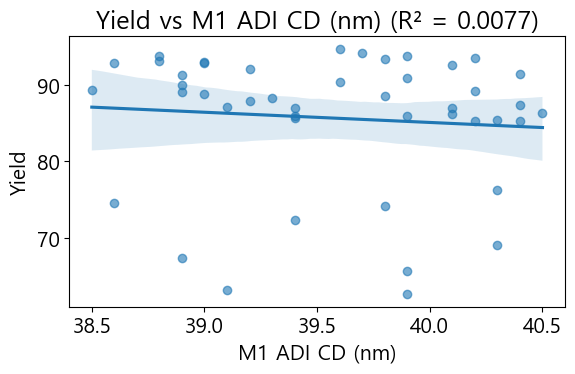

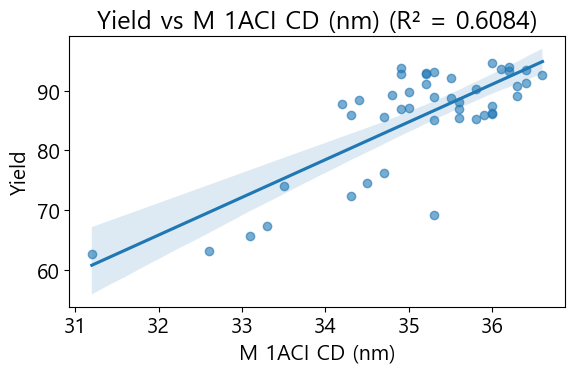

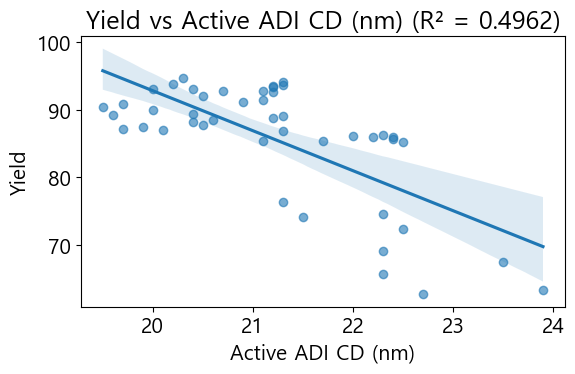

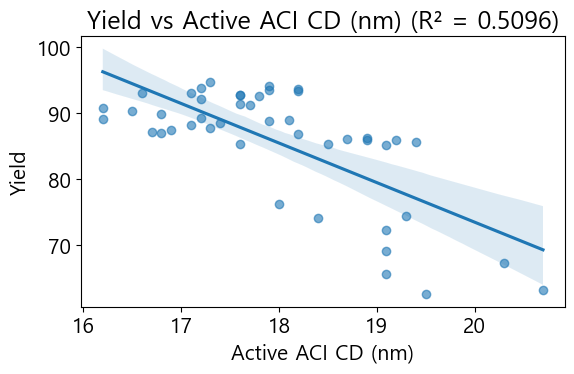

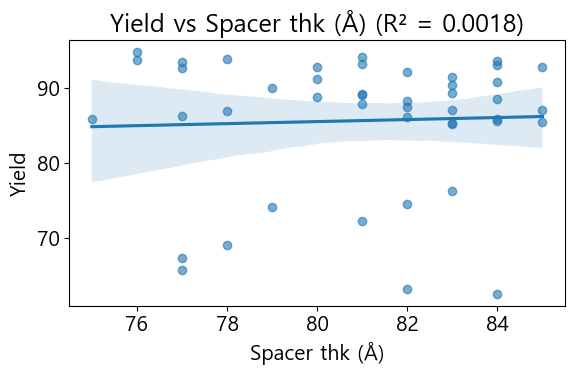

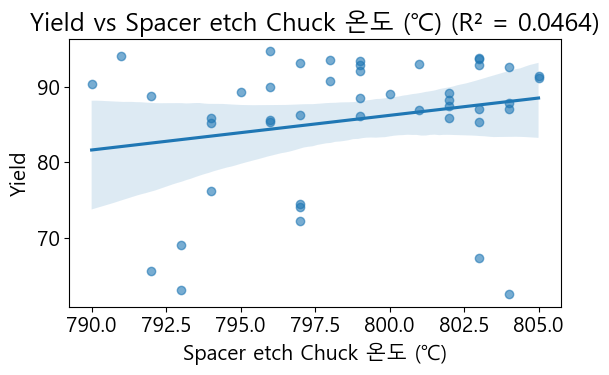

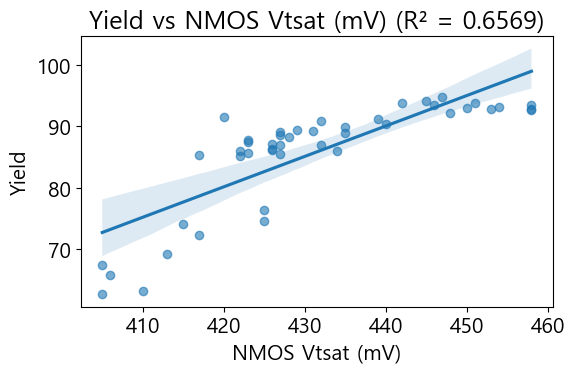

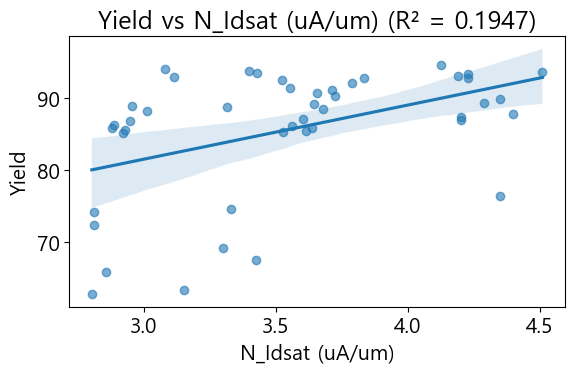

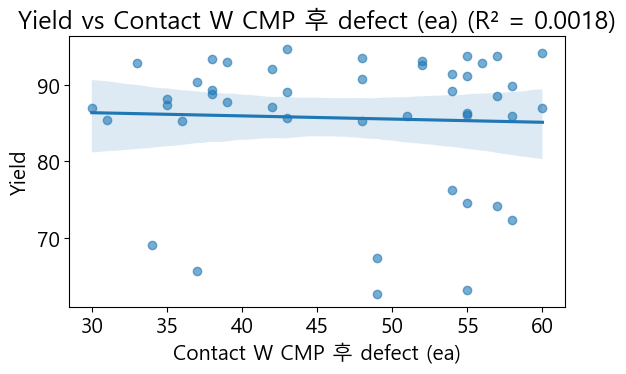

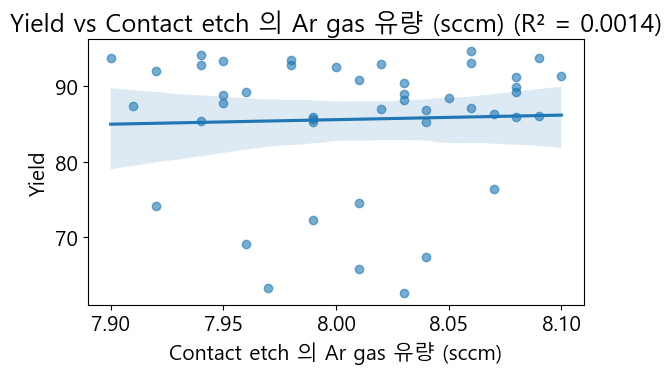

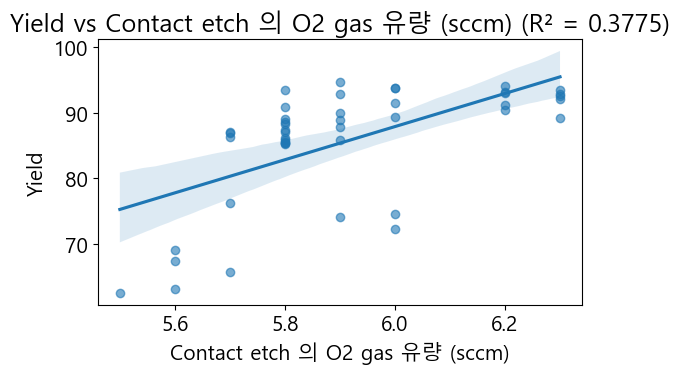

In [10]:


# 관계 확인할 변수 리스트
variables = [
    "M1 ADI CD (nm)", "M 1ACI CD (nm)", "Active ADI CD (nm)", "Active ACI CD (nm)",
    "Spacer thk (Å)", "Spacer etch Chuck 온도 (℃)", "NMOS Vtsat (mV)", "N_Idsat (uA/um)",
    "Contact W CMP 후 defect (ea)", "Contact etch 의 Ar gas 유량 (sccm)", "Contact etch 의 O2 gas 유량 (sccm)"
]


# 산점도 + 회귀선 + R² 출력
for var in variables:
    X = df[[var]].values
    y = df["Yield.1"].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.regplot(x=var, y="Yield.1", data=df, scatter_kws={"alpha": 0.6})
    plt.title(f"Yield vs {var} (R² = {r2:.4f})")
    plt.xlabel(var)
    plt.ylabel("Yield")
    plt.tight_layout()
    plt.show()
